## **Comparsion between various optimizers (SGD, RMSProp and ADAM)**

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

### **Build the data**

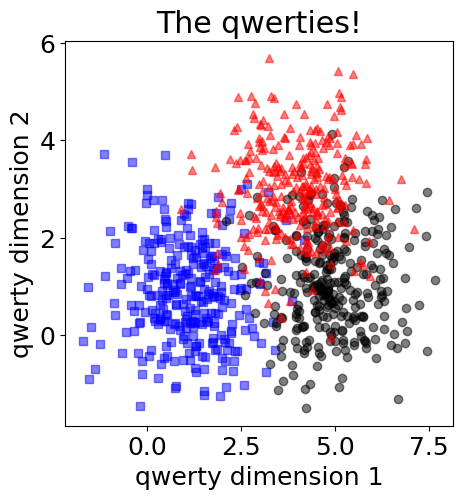

In [6]:
# create data

nPerClust = 300
blur = 1

A = [ 1, 1 ]
B = [ 5, 1 ]
C = [ 4, 3 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.hstack((  np.zeros((nPerClust)),
                         np.ones( (nPerClust)),
                       1+np.ones( (nPerClust))  ))

# concatanate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).long() # note: "long" format for CCE

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs',alpha=.5)
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko',alpha=.5)
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^',alpha=.5)
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [7]:
# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(data, labels, test_size=.1)

# convert them into PyTorch Datasets (data is already in tensors)
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

# translate into dataloader objects
batchsize    = 16
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

### **Create the model**

In [8]:
class ANNmodel(nn.Module):
    def __init__(self):
        super().__init__()

        #input layer
        self.input = nn.Linear(2,8)

        #Hidden layers
        self.hidden1 = nn.Linear(8,8)

        #output layer
        self.output - nn.Linear(8,3)

    ## Forward Pass function
    def forward(self,x):
        x = F.relu(self.input(x)) #activation function between input and hidden layer
        x = F.relu(self.hidden1(x)) #activation function between hidden and output layer

        return self.output(x)
        

In [10]:
def createANNmodel(optimizerAlgo, learning_rate):

    ## instantiate the model
    model = ANNmodel()

    ## Define loss function
    lossfun = nn.CrossEntropyLoss()

    ## define the optimizer function
    optifun = getattr(torch.optim, optimizerAlgo)
    optimizer = optifun(model.parameters(),lr=learning_rate )

    return model, lossfun, optimizer

    